In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
import os

In [4]:
data_dir = '../data/planetlab'
def find_smooth_load(root):
    res = pd.DataFrame(columns=['filename', 'score'])
    
    for dir in os.listdir(root):
        child = os.path.join(root, dir)
        if os.path.isdir(child):
            for csv in os.listdir(child):
                score = is_smooth(csv)
                if score > 0:
                    res.loc[res.shape[0]+1] = {'filename': csv, 'score': score}
    return res

In [5]:
csv = os.path.join(data_dir, '20110303', 'ait05_us_es_root')
df = pd.read_csv(csv)

In [8]:
df.shape, df.columns

((287, 1), Index(['2'], dtype='object'))

In [11]:
df = df.rename(columns={'2':'load'})
df.shape, df.columns

((287, 1), Index(['load'], dtype='object'))

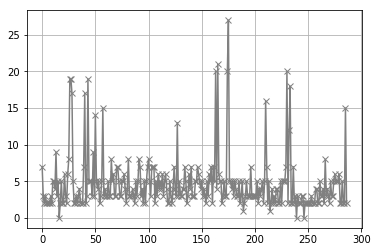

In [19]:
df = df.dropna()
plt.plot(df, color='gray', linestyle='-', marker='x')
plt.grid()
plt.show()

In [23]:
from statsmodels.tsa.stattools import adfuller as ADF
dftest = ADF(df['load'])
# 结果符合平稳序列
print(dftest)

(-13.192640923719955,
 1.1358624003544769e-24,
 0,
 286,
 {'1%': -3.4534232986669546,
  '5%': -2.8716994185534745,
  '10%': -2.5721833625116144},
 1484.0478483980992)

In [92]:
def auto_corr(ts, k):
    l = len(ts)
    ts1 = ts[:l-k]
    ts2 = ts[k:]
    ts_mean = ts.mean()
    ts_var = np.array([i**2 for i in ts - ts_mean]).sum()
    auto_corr = 0.0
    for i in range(l-k):
        auto_corr += (ts1[i] - ts_mean) * (ts2[i+k] - ts_mean) / ts_var
    return auto_corr

def auto_corr_series(ts):
    acs = np.array([])
    l = len(ts)
    for i in range(math.ceil(l/3)):
            acs = np.append(acs, auto_corr(ts, i))
    return acs

In [98]:
l1, l2 = [1,4,5,6], [3,4,2,8]
s1 = pd.Series(l1)
s2 = pd.Series(l2)
print(auto_corr(s1, 1))
auto_corr_series(s1)

0.14285714285714285


array([1.        , 0.14285714])

In [36]:
a, b = s1.mean(), s2.mean()
n = len(l1) if len(l1) == len(l2) else -1
sum = 0.0
if n != -1:
    for i in range(n):
        sum += (l1[i] - a)*(l2[i] - b)
print(sum)

9.0


In [43]:
s1.var(), s1.size

(4.666666666666667, 4)

In [42]:
std = 0.0
for i in range(n):
    std += pow(l1[i] - a, 2) / 3
print(std)

4.666666666666667


In [50]:
from statsmodels.tsa.stattools import acf

In [85]:
s3 = pd.Series([1,3,4,5,6,3,4])
acf(s1)

array([ 1.        ,  0.14285714, -0.21428571, -0.42857143])

In [55]:
l = len(s1)
s1[:l-1], s1[1:]

(0    1
 1    4
 2    5
 dtype: int64, 1    4
 2    5
 3    6
 dtype: int64)